# Introdução ao Python III

## Introdução

Até agora vimos sobre como estruturar códigos e escrever de forma que o computador entenda (aula 1) e os princípios básicos de como a linguagem Pyhton foi pensada (aula 2). Aqui nessa aula nos concentraremos nas bibliotecas NumPy e Pandas. Elas oferecem ferramentas poderosas para manipulação e análise de dados, respectivamente.

A partir da biblioteca NumPy aprenderemos como manipular dados de forma que cálculos sejam mais fáceis de serem resolvidos - tudo por meio de arrays multidimensionais e funções otimizadas.
Já a partir da biblioteca Pandas analisaremos dados de tabelas e planilhas - veremos as funções para manipular, filtrar, agrupar e resumir esses tipos de dados.

A forma como veremos esses tipos de dados são duas. Os vetores e os dataframes (e como utilizá-los) é a primeira forma, e essas funções separadas pelos "tipos de operações", a segunda.

Entendendo a lógica por trás do ferramental que estamos vendo até aqui nas aulas, vai ficar mais fácil pegar o big picture de tudo do trainee e os próximos conteúdos que vocês aprenderão após essa introudção ao Python.

<!--Ao longo da aula: adicionar mais referências, especialmente sobre onde expandir os conhecimentos sobre cada tema (VOU TIRAR ESSE LEMBRETE QUANDO ACABAR ESSA AULA)-->

## Vetores e Dataframes

<!--Motivar teoricamente porque estamos interessados em aprender outros tipos de (coleções de) dados, além da lista. O texto abaixo está interessante, mas pode não estar tão didático-->

Como fazemos uma sucessão de adição (multiplicação) ou subtração (divisão) em Pyhton?


Qual poderia ser a forma de multiplicação (ex. de pedaços de pizza):

p = [2/8, 3/8, 5/8] # 1) Fazemos uma lista (de pedaços de pizza) e colocamos que ela é igual a p.
Colocamos esse "igual" com o intuito de nomearmos um conjunto, no caso uma lista, para escrevermos mais facilmente os próximos comandos envolvendo a lista.
print(p * 2) # 2a) Esse print irá multiplicar os números da lista, mas não entre si.

Qual é de fato uma forma possível para uma quantidade pequena de termos:

p = [2/8, 3/8, 5/8] # 1) Fazemos uma lista e colocamos que ela é igual a l1.
Colocamos esse "igual" com o intuito de nomearmos um conjunto, no caso uma lista, para escrevermos mais facilmente os próximos comandos da lista.

print([i * 2 for i in p]) # 2b) Com esse print iremos multiplicar cada termo da lista por dois, pois colocamos um loop para transformarmos a nossa coleção.
(A transformação é multiplicar cada número da lista/coleção por dois.)

Qual poderia ser a forma de divisão (ex. de conversão de alturas de centímetros em metros):

a1 = [170, 185, 200] # 1) Fazemos uma lista (alturas fictícias) e colocamos que ela é igual a "a".
Colocamos esse "igual" com o intuito de nomearmos um conjunto, no caso uma lista, para escrevermos mais facilmente os próximos comandos envolvendo a lista.

print(a1 / 100) # 2a) Esse print deveria multiplicar os números da lista, mas não entre si. Mas não é possível fazer assim em Pyhton.

Qual é de fato uma forma possível para uma quantidade pequena de termos:

a1 = [170, 185, 200] # 1) Fazemos uma lista e colocamos que ela é igual a l1.
Colocamos esse "igual" com o intuito de nomearmos um conjunto, no caso uma lista, para escrevermos mais facilmente os próximos comandos da lista.
print([i / 100 for i in a1]) # 2b) Com esse print iremos dividir cada termo da lista por dois, pois colocamos um loop para transformarmos a nossa coleção.
(A transformação é dividir cada número da lista/coleção por 100.)

A lista não é multiplicada "termo-a-termo" (como poderíamos querer no primeiro print), que chato... Por que?

Em Pyhton, as listas só são multiplicadas de forma mais complexa do que simplesmente colocando a operação de multiplicação e os números que queremos multiplicar.


### Vetores

Vamos ter que considerar um novo tipo de coleção, os **vetores**!

A palavra vetor tem várias definições diferentes, nesta aula, em termos simplistas (!!), pensem em um vetor como uma coleção **homogênea** de dados.

Note que, para ser homogênea, todos os elementos devem ser do mesmo tipo. Tendo essa restrição, conseguimos aplicar **operações vetorizadas**, termo-a-termo, muito mais rápidas que usando um loop/comprehension.

Ou seja, podemos usar, como melhor método o loop/list comprehension apenas em arays como esses: `[1, "a", 3, (1, 2)]. Assim, é possível uma operação termo-a-termo sem ser homogênea, mas com o prejuízo de que essa operação será computada mais devagar do que se as operações fossem feitas em duas partes, separandos os termos para que cada parte fosse homogênea.

Note que vetores não podem conter vetores (pois estes tem o tipo "array"). Ainda assim, vetores podem ser multi-dimensionais. Pense que são coleções meramente organizadas em linhas/colunas.

Vamos conversar mais sobre vetores em breve.

#### Exemplos

Veja exemplos abaixo, e se poderão ou não ser entendidos como arrays:

- `[1]` poderá.
- `[1, 2]` poderá.
- `[1, "a"]` não poderá, tem elementos de tipos diferentes.
- `[1, [1, 2]]` não poderá, tem elementos de tipos diferentes (inteiro e uma coleção).

Alguns exemplos mais complexos:

- `[[1, 2], [3, 4]]` poderá! Arrays podem "conter si mesmos", mas, especialmente, entenda isso como arrays podem ser "organizados em múltiplas dimensões". No caso, seria um array bidimensional, uma matriz com linhas e colunas.
- `[[1, 2], [3, 4, 5]]` não poderá! Essa é outra novidade, os arrays devem ser "retangulares", dentro de cada dimensão, todos os elementos devem ter o mesmo tamanho. Isso ficará mais claro a diante.
- E `[[1, 2], [3, "a"]]`? Não poderá. Tudo dentro de um array tem que ter o mesmo tipo. Também podemos pensar que, dentro de uma dimensão, tudo deve poder ser entendido como um array.

Ok, então, um array é um caso específico de uma lista, é uma lista com duas restrições:

- Todos os elementos devem ter o mesmo "tipo".
- Deve ser retangulares.

#### Utilidade dos Vetores

Por que isso é útil? O que ganhamos com essa perda de generalização?

Na vida real, muitas vezes nos deparamos com esse tipo de dado. Em bases de dado, normalmente cada coluna é uma variável, uma coleção de valores de um mesmo tipo. Além disso, são incontáveis os lugares onde matrizes aparecem, e não apenas as bidimensionais.

Criar um framework que seja especializado nesses casos gera três benefícios principais:

- O clássico trade-off especialização-qualificação, o numpy é **muito** eficiente em realizar operações com esse tipo de dado. E o essa é uma das maiores propagandas que o numpy faz.
    - Inclusive, por trás dos panos, a nível técnico, arrays são objetos bem diferentes de listas.
- A criação de ferramentas especialmente intuitivas e úteis para o contexto.
- Facilitação do escopo, fica muito mais simples e intuitivo elencar as ferramentas que queremos ter para trabalhar.
    - Pense em como buscar as ferramentas relevantes para limpar uma base de dados, na documentação dos métodos de listas e bibliotecas math, stat, etc. Versus buscar as ferramentas na documentação do numpy.

### Dataframes

Com o conhecimento de o que são vetores, fica fácil de pensar que é muito comum que o nosso dado de interesse seja um conjunto de vetores.

A palavra dataframe tem várias definições diferentes, nesta aula, em termos simplistas (!!), ela significa uma coleção de vetores (todos do mesmo tamanho).

Também podemos pensar em dataframe como uma estrutura de dados de linhas e colunas, tipo uma planilha do Excel. Ambos têm um dicionário de listas, em que cada lista possui seus próprios nome para identificarmos.

Vamos adquirir o conhecimento aplicado sobre dataframes em breve.

Referências e aprodundamentos iniciais de vetores e dataframes

https://www.w3schools.com/ai/ai_vectors.asp,      
https://medium.com/analytics-vidhya/what-is-a-vector-5c86fc2b57c1#:~:text=A%20vector%2C%20in%20programming%2C%20is,are%20used%20for%20storing%20data,
https://computersciencewiki.org/index.php/Vector

https://www.databricks.com/glossary/what-are-dataframes,
https://medium.com/@jscvcds/a-beginners-guide-to-dataframes-with-examples-9aa6bf53fc06,
https://discovery.cs.illinois.edu/learn/Basics-of-Data-Science-with-Python/Python-for-Data-Science-Introduction-to-DataFrames/


## Numpy

<!-- Texto (enxuto, objetivo) sobre características básicas do Numpy -->

<!-- Existem muuuitas funções do Numpy. O material da aula passada está bom, mas organizar as funções nos "tipos de operação" (a estrutura abaixo) facilitará o aprendizado -->

<!-- tem que checar na documentação do numpy se não há outras funções/métodos importantes, que queremos falar sobre. Com certeza, tem funções que mereceriam estar pelo menos linkadas aqui -->

O que é Numpy? De acordo com o [site oficial](https://numpy.org/doc/stable/index.html):

> NumPy é o pacote fundamental para computação científica em Python. É uma biblioteca Python que fornece um objeto array multidimensional, vários objetos derivados (como arrays mascarados e matrizes) e uma variedade de rotinas para operações rápidas em arrays, incluindo matemática, lógica, manipulação de forma, classificação, seleção, E/S. , transformadas discretas de Fourier, álgebra linear básica, operações estatísticas básicas, simulação aleatória e muito mais.

> Como curiosidade, há outras bibliotecas desse tipo, chamadas de vetores de curiosidade. Essas bibliotecas facilitam a manipulação e cálculo de vetores (arrays) e, por isso, são muito usados na área de ciência de dados. Um outro exemplo de biblioteca semelhante ao NumPy é o Jax, desenvolvido pelo Google.

Antes de tudo, vamos [instalar](https://numpy.org/install/) e carregar a biblioteca:

In [1]:
import numpy as np

Obs: exemplo de eficiência de operações vetorizadas no Numpy:

In [2]:
n = 1000000
a1 = np.arange(n) #criação de lista usando a biblioteca NumPy
l1 = list(range(n)) #criação de outra lista usando método padrão de python
%timeit a1 * 2 #tempo para ele executar a operação (a1*2) usando a biblioteca
%timeit [x * 2 for x in l1] #tempo de execução sem a biblioteca
#Observe a diferença entre os tempos de execução para realizar a mesma tarefa!

3.9 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
279 ms ± 73.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Criação e Características

<!-- buscar uma maneira suave de explicar vetores vs matrizes vs arrays -->

Vamos começar vendo a "cara" dos arrays (vetores):

In [3]:
# Criando alguns arrays
# Obs: já fizemos a importação na aba de código anterior.
# Mas na dúvida, escreva a importação.
a1 = np.array([1, 1, 1])
a2 = np.array([[1, 0, 1], [3, 4, 1]])
a3 = np.array([[[1, 7, 9], [5, 9, 3]], [[3,2,1], [4,5,6]]])
for a in [a1, a2, a3]: print(a, "\n")
# Aqui fazemos uma lista com todos os vetores.
# O texto "\n" é uma sintaxe especial que gera uma linha em branco/vazia

[1 1 1] 

[[1 0 1]
 [3 4 1]] 

[[[1 7 9]
  [5 9 3]]

 [[3 2 1]
  [4 5 6]]] 



<!-- salvar na pasta assets/img e colocar aqui na sintaxe de markdown -->
<img src="https://www.plus2net.com/python/images/np-dimensions.jpg" width="400">

Note que começamos a "contar" pelo vetor, depois pelas linhas, depois pelas matrizes, etc.

Existem várias maneiras de criar vetores. Listá-los seria muita decoreba, então veja-as em [Extras](#numpy-criação-de-vetores).

#### Características
*  `TYPE()`: Quando aplicada a um array (vetor), retornará: `<class 'numpy.ndarray'>`
*  `DTYPE`: escrita como `vetor.dtype`, retorna o tipo dos elementos dos vetores, como `int`, para números inteiros ou `float`, para números flutuantes.
*  `SHAPE`: escrita como `vetor.shape`, retorna o número de linhas seguido do número de colunas. Resultado: `(n linhas, n colunas)`
*  `RANGE` ou `ARANGE`: são métodos para criar arrays dentro de um alcance. O range irá criar uma lista que depois deve ser convertida em um array. Já arange, é um método direto da biblioteca NumPy para criar um array com esse alcance.

In [ ]:
# Exemplo de array criado com range
import numpy as np

# Usando range para criar uma lista de números de 0 a 9
lista = list(range(10))

# Convertendo a lista em um array NumPy
vetor = np.array(lista)

print(vetor)

In [ ]:
# Exemplo de array criado com arrange
# Usando arange para criar um vetor de números de 0 a 9
vetor = np.arange(10)

print(vetor)

*  Formatos dos Vetores
1. Vetores Linha: são vetores de formato (1, n). Escritos por: `vetor = [[1, 2, 3]]`
2. Vetores Coluna: são vetores de formato (n, 1). Escritos por: `vetor = [[1], [2], [3]]`
*  `COPY`: podemos escrever `vetor_cópia = vetor.copy()` para criar uma cópia com os mesmos elementos que podemos editar sem alterar os dados do vetor original.
*  `TOLIST()`: escrevemos `lista = vetor.tolist()` para transformar o vetor em uma lista com os mesmos elementos.

### Tipos de arrays

Mais cedo, falamos que todos os elementos de um arrays tem sempre o mesmo "tipo". Em termos simplificados, o nome normalmente associado à "tipo" é _dtype_.

Um elemento (um "escalar") pode ter vários tipos, mas os mais comuns são:

- `int_`: números inteiros (_integer_).
- `float_`: números de ponto flutuante (_floating-point_). O tipo padrão.
- `bool_`: valores booleanos (`True` ou `False`).
- `str_`: _strings_ de texto.
- E outros menos utilizados: `complex_`: números complexos, `object_`: objetos Python genéricos, `datetime64`: datas e horários, `timedelta64`: diferenças entre datas e horários, `category`: categorias ou rótulos.

Veja alguns comentários técnicos na seção [Mais Sobre Tipos](#mais-sobre-tipos).

#### Coerção de Tipos

Mas e se eu tentar criar o array `[1, "a"]`? O numpy usa _coerção_, ele converte todos os elementos a um mesmo tipo, de acordo com uma lista de prioridade. De maneira simples, _int_ → _float_ → _string_. Você também pode converter um array para outro tipo usando o método `x.astype()`. Veja exemplos abaixo.

In [ ]:
print(np.array([[1,2], [3.0, 4]]), "\n")
print(np.array([[1,2], [3.0, "4.0"]]), "\n")
print(np.array([[1,2], [3, 4]], dtype = np.complex_), "\n")
print(np.array([[1,2], [3, 4]]).astype(str), "\n")

#### Mais Informações

Para mais informações sobre arrays, como funcionam, como são salvos na memória, veja [API Ref. → Array objects](https://numpy.org/doc/stable/reference/arrays.html). Cuidado, muitos temas técnicos e desnecessários (para o momento).

Especialmente, foram ignorados dois tópicos de arrays:

- Os _masked arrays_, arrays com valores faltantes, [API Ref. → Array objects → Masked arrays](https://numpy.org/doc/stable/reference/maskedarray.html).
- E os _datetime arrays_, arrays de datas, [API Ref. → Array objects → Datetimes and Timedeltas](https://numpy.org/doc/stable/reference/arrays.datetime.html).

### Operações Vetorizadas

Lembre-se que o ponto mais importante é a vetorização. O numpy define "funções universais", funções que podem ser aplicadas de forma vetorizadas.

Listar as funções seria muita decoreba, veja-as em [Extras](#numpy-operações-vetorizadas). Abaixo, explicamos algumas das mais úteis.

* `np.subtract(a1, a2)` subtrai os núemros de index iguais dos vetores a1 e a2
* `np.divide(a1, a2)` divide os números de a1 pelos seus pares de a2
* `np.exp(a1)` eleva o número de Euler (2,718) aos números do vetor
* `np.log(a1)` retorna o logaritmo natural (log e) de cada elemento da tabela

### Subset

A referência básica está em [User guide → Indexing on ndarrays](https://numpy.org/doc/stable/user/basics.indexing.html).

A indexação de arrays é feita de forma similar à listas, com `a1[algo]`. A maioria das técnicas disponíveis para listas está disponível aqui também.

Essa parte é bem útil, porque lógicas similares de indexação podem ser utilizadas no pandas e em listas.

#### Subseting Básico

Com uma dimensão, é simples. Conseguimos utilizar a técnica de indexes negativos.

In [8]:
# Usando indexing em Arrays
import numpy as np
# Definindo o array
a1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# Printando o array e uma linha vazia
print(a1, "\n")
# Printando os elementos de index 0 e -1
print(a1[0])
print(a1[-1])

[1 2 3 4 5 6 7 8 9] 

1
9


E com duas dimensões? Agora, temos que informar o que queremos pegar de cada dimensão, `a2[algo1, algo2]`:

In [9]:
# Indexing em matrizes
# Criando uma matriz 3x3
a2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# Printando a matriz e uma linha vazia
print(a2, "\n")
#Print do elemento com os index da sua linha e desse elemento dentro da linha
print(a2[0, 1])

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

2


E se eu quiser selecionar mais do que um elemento? Aqui, também é possível utilizar a técnica de slicing `:`.

In [10]:
# Uso de intervalos de index em vetores
# Elementos entre 1 a 3
print(a1[1:3])
# Elementos a partir do 1
print(a1[1:])
# Elementos até o 2
print(a1[:2])
# Elementos do início ao fim
print(a1[:])

[2 3]
[2 3 4 5 6 7 8 9]
[1 2]
[1 2 3 4 5 6 7 8 9]


Com duas dimensões é a mesma ideia, lembrando que precisamos falar o que queremos pegar de ambas as dimensões, as possibilidades aumentam.

<!-- cuidado pra falar demais sobre isso, não deixar amendrontador demais -->

In [11]:
# Intervalos em Matrizes
# Linha 0, elementos de 0 até 2
print(a2[0, 0:2])
# Linhas entre 0 até 2, elementos 1
print(a2[0:2, 1])
# Linhas a partir de 1, elementos do início ao fim
print(a2[1:, :])

[1 2]
[2 5]
[[4 5 6]
 [7 8 9]]


Com _n_ dimensões é a mesma ideia, com uma entrada em `[]` para cada dimensão.

Se tiver curiosidade, veja dois truques usando `...` e `None` nos índices [aqui](https://numpy.org/doc/stable/user/basics.indexing.html#dimensional-indexing-tools).

In [12]:
# Exemplo de indexing com n dimensões
import numpy as np
# Criando um vetor de alcance 27 (3 ^ 3), e dividindo o em 3 matrizes 3 x 3.
a3 = np.arange(3**3).reshape(3, 3, 3)
# Exibindo o elemento 0, da linha 2 da matriz 2
print(a3[2, 2, 0])
# Exibindo todos os elementos de todas as linhas da matriz 0
print(a3[0, :, :])

24
[[0 1 2]
 [3 4 5]
 [6 7 8]]


Quando você ficar pica, vai descobrir que dá para omitir dimensões, como abaixo. Mas por enquanto, não inventa, coloque um "algo" para cada dimensão, nem que o "algo" seja "selecione tudo" (`:`).

In [13]:
print(a3[0:])

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


Note que essa noção do subset deixa claro qual é a "ordem" dos componentes de um array multidimensional. Isto é, quando pedimos `for i in a3`, o que será passado para `i`? Cada elemento? Cada coluna, cada linha? cada matriz?

In [14]:
# Aqui estamos usando loops para cada sub elementos das etapas
# Aqui "mat" se refere as matrizes de a3
for mat in a3:
  # Aqui "row" seriam as linhas das matrizes
    for row in mat:
      # E aqui os elementos dessas linhas
        for item in row: print(item, end = " ")
        # Pedimos pra printar os elementos, que chamamos de "item"

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 

Vemos que, do array tridimensional `a3`, `mat` são as sub-matrizes, `row` são as linhas de uma sub-matriz, e `item` os elementos de cada linha. Isto é, a ordem é da maior/última/mais alta dimensão para a menor/mais baixa.

#### Filter

E se os índices que você quer obter estão em uma coleção? Podemos utilizar coleções de inteiros ou booleanos para acessar índices também!

In [18]:
print(a1[np.array([1, 2])]) #a1[[1, 2]]
print(a1[np.array([True,False,False,True,False,False,False,True,False])])
# False para aqueles que não queremos e True para aqueles desejados

[2 3]
[1 4 8]


Note que para booleanos, o índice-coleção precisa ser do mesmo tamanho da dimensão relevante.

O legal é que dá para utilizar isso para criar _filtros_:

In [17]:
print(a1[a1 + 1 > 2])

[2 3 4 5 6 7 8 9]


Existem muitas outras técnicas utilizando essas ferramentas. Veja mais [aqui](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing).

Falamos apenas sobre um tipo de operação, "subset". Exitem vários outros que valem a pena saber, veja mais em [Extras](#numpy-outros-tipos-de-operações).

### Repeated Operations

*  `NP.WHERE`: Permite atribuir operações quando certos requisitos são atendidos. Sintaxe: `numpy.where(condição, valor_se_verdadeiro, valor_se_falso)`


In [ ]:
# Exemplo de WHERE
import numpy as np

# Criando um array de exemplo
arr = np.array([1, -2, 3, -4, 5])

# Usando np.where() para substituir valores negativos por 0
resultado = np.where(arr > 0, arr, 0)

print(resultado)

[1 0 3 0 5]


*  `FOR`: Método padrão para iterar sobre elementos de listas ou arrays. É em geral mais lento do que `np.where`. Sintaxe: `For x in array operação`

In [ ]:
# Exemplo de FOR, com a mesma função do exemplo anterior
import numpy as np

# Criando um array de exemplo
arr = np.array([1, -2, 3, -4, 5])

# Criando uma cópia do array para modificar dentro do loop
resultado = arr.copy()

# Usando um loop for para substituir valores negativos por 0
for i in range(len(resultado)):
    if resultado[i] < 0:
        resultado[i] = 0

print(resultado)

**Fim!**

Pronto! Vocês aprenderam os primeiros conteúdos de NumPy! Agora, podemos aplicar esse novo jeito de pensar para bases de dados, e conhecer a biblioteca especializada nisso, o Pandas. A partir de agora, pensa sempre sobre os dados vetorizados. Esse conceito é essencial para entender Pandas, uma vez que só assim as funções de manipular, filtrar, agrupar e resumir esses tipos de dados fazem sentido e são programadas.



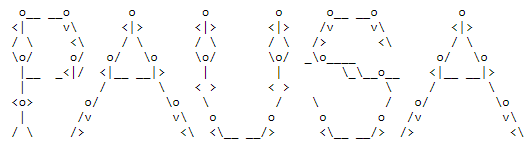

## Pandas

<!-- Texto (enxuto, objetivo) sobre características básicas do Pandas. O texto da aula antiga está grande demais -->

<!-- Existem muuuitas funções do Pandas. O material da aula passada está bom, mas organizar as funções nos "tipos de operação" (a estrutura abaixo) facilitará o aprendizado -->

<!-- tem que checar na documentação do pandas se não há outras funções/métodos importantes, que queremos falar sobre. Com certeza, tem funções que mereceriam estar pelo menos linkadas aqui -->

In [ ]:
import pandas as pd

### Criação e Características

import pandas as pd # 1) Esse é sempre o primeiro passo: o de importarmos a biblioteca necessária.

df = pd.read_csv('data.csv') #* 2) Esse é outro passo essencial: o de identificarmos qual é a planilha dos dados que vamos usar. Usaremos esse comando bastante daqui para frente. Mas ele só serve para quando temos aquivos externos.

print(df.to_string()) 3) Aqui nós fazemos a operação inicial mais importante: pedimos para que seja exibido o objeto DataFrame (df)  convertido em em uma representação de string, formatada como uma tabela.*

Antes de continuarmos a falar sobre dataframes, temos que ressaltar que o Pandas tem seu próprio objeto de vetor chamado pd.Series, mas que funciona de forma bem parecida do np.arrayde com uma dimensão.

print(pd.Series([4, 7, -5, 3])) # 1) Nesse exemplo nós pedimos para os termos 4, 7, -5 e 3 serem exibidos.

print(pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])) # 2) Nesse exemplo nós definimos que queremos que os mesmos termos do exemplo de cima sejam exibidos com os índices "d", "b", "a" e "c", nessa ordem.



A seguir veremos os métodos shape, types, info, head, tail e dtypes (já vimos eles com NumPy, agora veremos com Pandas, ou seja, manipulando não mais cálculos para serem resolvidos e sim para analisaremos dados de tabelas e planilhas). (Já podemos nos dar um tapinha nas contas e nos sentirmos orgulhosos de quanto vamos aprender até o final dessa aula, sem falar no final das próximas...)

Estamos falando de método mas não custa reforçar o que é: eles são usados para realizar operações em objetos ou acessar suas propriedades. Cada  método é uma função que "pertence" a um objeto. Eles são escritos de forma padronizada: com o nome da nome do método + ponto final (.) + identificação da variável. (Desconsidere os sinais de adição quando for escrever o método.)

Adiantando um pouco sobre uso de cada método. Cada um é útil dependendo do contexto. Dados já estruturados em formato de dicionário ou listas (os exemplos iniciais que estamos usando aqui para apresentar Pandas), os métodos diretos são melhores, pois são mais rápidos e identificam poucas coisas por vez.

Já para lermos arquivos que contêm conjuntos de dados maiores e mais complexos, como csv (dados tabulares no geral), é necessário que utilizemos em primeiro lugar um método específico para lê-los, e depois fazermos as devidas personalizações (que veremos nas próximas aulas).

A princípio de tudo vamos fazer três colunas simples: nome, idade e cidade de três pessoas diferentes. Nosso objetivo aqui é conhecer o que é necessário para criá-la.

In [ ]:
import pandas as pd

# Criando um dicionário com dados
data = {
    'Nome': ['Sérgio', 'Michelle', 'Catarina'],
    'Idade': [20, 35, 45],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte']
}
# Criando o DataFrame
df = pd.DataFrame(data)

# Exibindo o DataFrame
print(df)

       Nome  Idade          Cidade
0    Sérgio     20       São Paulo
1     Luísa     35  Rio de Janeiro
2  Catarina     45  Belo Horizonte


### Subset

Aqui falaremos sobre como trabalhar com parte ou seleção de um conjunto maior de dados. Primeiro vamos ver os principais comandos para manipular as colunas de uma tabela e depois veremos como fazer o mesmo com linhas. Por último veremos sobre como manipular colunas e linhas juntas.
<!-- tentar trazer alguma sanidade para os diferentes métodos de fazer coisas parecidas -->
<!-- Exemplo: Quando você ficar pica, vai descobrir que dá para omitir dimensões, como abaixo. Mas por enquanto, não inventa, coloque um "algo" para cada dimensão, nem que o "algo" seja "selecione tudo" (`:`). -->

#### De Colunas



columns

colunas = df.columns # 1) Aqui nós estamos criando uma varíavel que chamamos de colunas e usando o método .columns acessamos as colunas do nosso DataFrame.

print(colunas) # 2) Aqui pedimos para ser as colunas serem impressas.

key

nomes = df['Nome da coluna']

print('nome da coluna')

Aqui nós criamos uma variável chamada nomes e não especificamos qual é a coluna que queremos acessar. Indicando uma coluna existente, ela aparecerá de output.


.key

Acessa uma coluna (se o nome da coluna não tiver espaços ou caracteres especiais) como um atributo.

A forma de printarmos esta coluna é df.key e print, igual o método key.

A diferença é que este método não pode ser a coluna tiver espaços, caracteres especiais ou começar com um número, por exemplo

key1, key2

subset = df[['nome de uma coluna', 'nome de outra coluna']]

print(subset)

Este módulo nos ajuda a selecionar mais de uma coluna por vez, retornando um novo DataFrame.

#### De Linhas

Agora vamos começar a brincar um pouco com nossas colunas (iei!). Nosso objetivo aqui é entender como exibir apenas parte de nosso dados.


shape


 df.shape()

 print()

 Com o método shape nós não precisamos contar o número de linhas e colunas de nossa tabela.Ela conta primeiro as linhas e depois as colunas.

dtype

print("\nTipos de Dados de Cada Coluna (dtypes):\n", df.dtypes)

Com o método dtype nós descobrimos quais partes de nossa tabela é integer (int) e object.

info

print("\nInformações sobre o DataFrame (info):")

df.info()

Com o método info nós sabemos de forma estrtura o número total de entradas, o tipo de dados de cada coluna e o uso de memória. Ou seja, um resumo do DataFrame.

head

print("\nPrimeiras linhas (head):\n", df.head(2))  

Com o método head nós podemos escolher a quantidade de linhas que aparecem. Importante ressaltar que não escolhemos de qual linha que começa - é sempre da primeira.

sampel

print("\nAmostra aleatória (sample):\n",

df.sample(2))

Com o método sample é escolhido aleatoriamente escolher linha(s) dependendo da quantidade que colocamos.

tail

print("\nÚltimas linhas (tail):\n",

df.tail(2))

Com o método tail nós podemos escolher a quantidade de linhas que aparecem.
Importante ressaltar que não escolhemos de qual linha que começa - é sempre da última e em ordem decrescente. (Quando não especificamos uma quantidade de linhas, por padrão são 5.)

filter

print("Colunas filtradas com 'Nome':\n", filtro_nomes)

print("\nColunas filtradas com regex 'Idade':\n", filtro_salario)

Aqui nós estamos usando dois Dataframes: o primeiro filtra colunas com base em uma expressão, e o segundo filtra colunas com base em uma expressão comum.

Aplicando essa definição temos que: filtro_nomes é um DataFrame resultante de uma operação que filtra nossa coluna chamada "Nome". Já filtro_salario é um DataFrame que filtra colunas com base em uma expressão regular que, neste caso, busca colunas que correspondem à palavra "Idade" ou um padrão relacionado. Neste caso, só há uma coluna chamada assim.



.query

filtro_idade = df.query('Idade > 30')

Este método filtra os dados de maneira expressiva e legível. Ele suporta operadores como >, <, ==, !=, & (e), | (ou), e ~ (não).

(Ele também suporta expr, inplace e kwargs. As duas primeiras significam a expressão filtrada passa como uma string e se True, modifica o DataFrame original, repsectivamente. Já kwargs vimos nos extras da aula 2. Mas para retomar e simplificando muito [!!!, olhem na aula 2 a explicação completa]: são argumentos adicionais para avaliar a expressão.)

Para finalizar: no nosso exemplo, queremos o filtro de todas as idades maiores do que 30.


#### Ambos Juntos
<!-- loc, iloc -->
<!-- apenas fazer referencia (linkar) sobre it e iat -->

loc

print("\nLinhas 1 e 3 com Nome e Idade:\n", resultado_multi)

Este método nos ajuda a acessar e manipular dados de linhas e colunas:  apenas uma delas ou ambas.

No nosso exemplo, o resultado são as linhas e colunas que foram selecionadas, ou seja, da 1 a 3.

iloc

resultado_fatiamento = df.iloc[:, 0:2]

print("\nTodas as linhas e as colunas Nome e Idade:\n", resultado_fatiamento)

Este método nos permite selecionar dados usando os rótulos das linhas e colunas, em vez de suas posições inteiras. Ou seja, manipulamos os índices baseados em zero da nossa tabela.

No nosso exemplo, o que fizemos foi selecionar todas as linhas de um DataFrame e apenas as duas primeiras colunas.

### Operate/Create

<!-- criar/deletar/alterar colunas -->
<!-- criar/deletar/alterar linhas -->

<!-- apenas fazer referencia sobre criar/deletar/alterar células -->
<!-- lidar com dados NA -->


### De Colunas

Criar

df['Salario'] = [50000, 60000, 70000]


print("DataFrame após adicionar a coluna 'Salario':\n", df)

Com esse comando inserimos dados novos. Nesse caso, uma coluna de salário.

Deletar

df = df.drop(columns=['Salario'])

print("\nDataFrame após deletar a coluna 'Salario':\n", df)

Com esse comando tiramos alguma coluna. Neste caso, a própria coluna criada anteriomente.


Alterar

df['Idade'] = df['Idade'] + 5

print("\nDataFrame após alterar a coluna 'Idade':\n", df)

Este comando só é possivel, pois o Pandas consegue ser usado para calcular operações aritméticas em colunas inteiras. Assim, podemos somar ou subtrair os números de uma coluna de nossa tabela de uma vez.

#### De Linhas


Criar

nova_linha = pd.DataFrame({'Nome': ['Sofia'], 'Idade': [35]})

df = pd.concat([df, nova_linha], ignore_index=True)

print("DataFrame após adicionar a linha de Sofia:\n", df)

Este método nos ajuda a concatenar dois ou mais DataFrames. No caso, estamos concatenando o DataFrame original da Sofia com o novo. Mais espeficifamente, estamos criando um novo (primeira linha de código) e desconsiderando a linhas antiga que também se refere a Sofia (segunda linha de código). A nossa alteração específica é em sua idade, podendo ser outro, não espcificamente de número.

Deletar

df = df.drop(index=1)

print("\nDataFrame após deletar a linha de Michelle:\n", df)

O argumento index=1 indica que você deseja deletar a linha que possui o índice 1. Os índices em pandas são baseados em zero, então index=1 se refere à segunda linha do DataFrame.

Alterar

df.loc[0, 'Idade'] = 26

print("\nDataFrame após alterar a idade de Sérgio:\n", df)

O primeiro elemento, 0, refere-se ao rótulo da linha que você deseja acessar. Neste caso, isso indica que você está se referindo à linha com o índice 0.
O segundo elemento, 'Idade', refere-se ao nome da coluna que você deseja alterar. Aqui, você está acessando a coluna chamada 'Idade'. = 26: esta parte do código atribui o valor 26 à célula que corresponde à linha 0 (a primeira linha) na coluna 'Idade'. Assim, você está alterando o valor atual dessa célula para 26.

### Reorder
<!-- mais algo? criar um exemplo mais concreto? -->

Linhas:

```
df1.sort_values(by='cases', ascending=False)
```

ascending=False: Este argumento determina a ordem da classificação. Ao definir ascending=False, indicamos que deseja uma ordem decrescente. Isso significa que os valores mais altos na coluna 'cases' aparecerão primeiro.

```
df1.reindex(columns=['year', 'cases', 'population', 'country'])
```

df1: Este é o DataFrame que você está manipulando. Ele contém dados estruturados em linhas e colunas.

.sort_values(...): Este é um método do pandas que permite ordenar um DataFrame com base nos valores de uma ou mais colunas.

by='cases': Este argumento especifica a coluna pela qual você deseja ordenar o DataFrame. Neste caso, a coluna é chamada 'cases'. Isso significa que o DataFrame será ordenado com base nos valores presentes nessa coluna.

ascending=False: Este argumento determina a ordem da classificação. Ao definir ascending=False, você está indicando que deseja uma ordem decrescente. Isso significa que os valores mais altos na coluna 'cases' aparecerão primeiro.

### Rename

<!-- mais algo? criar um exemplo mais concreto? -->

Linhas:

```
df1.rename({0: 'Row1', 1: 'Row2', 2: 'Row3', 3: 'Row4', 4: 'Row5', 5: 'Row6'})
```

Colunas:

```
df1.rename(columns={'cases': 'new_cases', 'population': 'new_population'}, inplace=False)
```

df1: Este é o DataFrame que você está manipulando. Ele contém linhas e colunas com dados.

.rename(...): Este é um método do pandas que permite renomear as linhas ou colunas de um DataFrame. O método retorna uma nova versão do DataFrame com as alterações especificadas.

{0: 'Row1', 1: 'Row2', ...}: Este dicionário especifica as mudanças de nome:

As chaves (0, 1, 2, ...) representam os índices originais das linhas do DataFrame.
Os valores ('Row1', 'Row2', ...) são os novos nomes que você deseja atribuir a essas linhas.

Assim como na parte de Numpy, alguns tipos de operações mais avançados não foram tratados aqui. Veja-os em [Extras](#pandas-outros-tipos-de-operações). Parte deles serão tratados nas próximas aulas.

### Repeated Operations

<!-- aplicar uma mesma operação várias colunas, mais algo? -->

import pandas as pd

# Criando um DataFrame de exemplo
data = {
    'Nome': ['Aroldo', 'Cátia', 'Tânia'],
    'Salario': [50000, 60000, 70000],
    'Bonus': [5000, 7000, 8000]
}

df = pd.DataFrame(data)

print("DataFrame original:\n", df)

# Função para aumentar valores em 10%
def aumentar_10_porcento(x):
    return x * 1.1

# Aplicando a função em várias colunas
df[['Salario', 'Bonus']] = df[['Salario', 'Bonus']].apply(aumentar_10_porcento)

print("\nDataFrame após aumentar Salario e Bonus em 10%:\n", df)


## Extras

<!-- frizar a importancia de estudar as operações do pandas -->

### NumPy: Criação de Vetores

#### Vetores Placeholder

Também podemos criar arrays com valores comuns, temos várias funções, como:

- [numpy.empty](https://numpy.org/doc/stable/reference/generated/numpy.empty.html): cria um array vazio com a forma especificada.
- [numpy.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html): cria um array preenchido com uns.
- [numpy.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html): cria um array preenchido com zeros.
- [numpy.full](https://numpy.org/doc/stable/reference/generated/numpy.full.html): cria um array preenchido com um valor constante.
- [numpy.eye](https://numpy.org/doc/stable/reference/generated/numpy.eye.html): cria uma matriz identidade.
- [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html): cria um array com valores espaçados uniformemente dentro de um intervalo.
- [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html): cria um array com valores espaçados uniformemente dentro de um intervalo especificado.

In [ ]:
print("Empty: \n", np.empty((2, 3)), "\n")
print("Ones: \n", np.ones((2, 3)), "\n")
print("Zeros: \n", np.zeros((2, 3)), "\n")
print("Full: \n", np.full((2, 3), 5), "\n")
print("Eye: \n", np.eye(3), "\n")
print("Linspace: \n", np.linspace(0, 10, num=5), "\n")
print("Arange: \n", np.arange(0, 10, 2), "\n")

Empty: 
 [[1.48539705e-313 1.06099790e-313 6.36598738e-314]
 [4.24399158e-314 8.48798316e-314 1.27319747e-313]] 

Ones: 
 [[1. 1. 1.]
 [1. 1. 1.]] 

Zeros: 
 [[0. 0. 0.]
 [0. 0. 0.]] 

Full: 
 [[5 5 5]
 [5 5 5]] 

Eye: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Linspace: 
 [ 0.   2.5  5.   7.5 10. ] 

Arange: 
 [0 2 4 6 8] 



#### Vetores Aleatórios

O numpy tem uma parte da biblioteca focada na geração de números aleatórios, [numpy.random](https://numpy.org/doc/stable/reference/random/index.html). Se tiver curiosidade, leia mais sobre como computadores geram [números pseudo-aleatórios](https://www.revista-programar.info/artigos/pseudorandom-number-generators-prngs/).

Todas as distribuições que você pensar podem ser geradas pelo numpy:

- Uniforme: [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html).
    - Uniforme 0-1: [numpy.random.random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html).
    - Uniforme discreta A-B: [numpy.random.integers](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html).
- Binomial: [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html).
- Normal: [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html).
- Poisson: [numpy.random.poisson](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html).
- Samplear um array: [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html).

#### Vetores Importados

Podemos salvar arrays em arquivos, usando funções como:

- [numpy.save](https://numpy.org/doc/stable/reference/generated/numpy.save.html): salva como um "arquivo array" ".npy".
- [numpy.savetxt](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html): salva como um arquivo CSV, adequado apenas para arrays 1D e 2D.
- [A biblioteca pickle](https://docs.python.org/3/library/pickle.html): uma bilbioteca que consegue "conservar" qualquer objeto do python, mas pode ser demorado.

Similarmente, podemos importar arquivos, com funções `numpy.load` e `numpy.loadtxt`.

Por fim, é comum converter outros objetos em arrays. Veja as funções [numpy.asarray](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html) e [pandas.Series.to_numpy](https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.Series.to_numpy.html).

<!-- É esse tipo de comentário com referências para mais conteúdo que deve ser criado com mais frequência, e nas outras aulas!! -->

Para mais informação sobre criação de arrays, veja [API Ref. → Routines → Array creation](https://numpy.org/doc/stable/reference/routines.array-creation.html):

- [Criando por forma e valor](https://numpy.org/doc/stable/reference/routines.array-creation.html#from-shape-or-value).
- [Criando por dados](https://numpy.org/doc/stable/reference/routines.array-creation.html#from-existing-data), e [API Ref. → Routines → I/O](https://numpy.org/doc/stable/reference/routines.io.html).
- [Criando por ranges](https://numpy.org/doc/stable/reference/routines.array-creation.html#numerical-ranges).
- [Criando matrizes](https://numpy.org/doc/stable/reference/routines.array-creation.html#building-matrices).

### Numpy: Mais Sobre Tipos

Como iniciado na parte de dtype() de Pandas, na realidade, embora exista o conceito de "número inteiro", e o Python só defina um tipo de dado _integer_, existem muitas maneiras de representar um número na memória do computador. O numpy se importa com isso, e existem vários tipos para cada um dos conceitos acima.

- Por conta disso, o dtype pode aparecer com nomes diferentes como _int64_.
- Se você for muito nerd, talvez isso importe para o seu projeto. Para escolher um tipo específico use a função `np.array` com o argumento `dtype = ...`. Leia mais sobre isso [aqui](https://numpy.org/doc/stable/reference/arrays.scalars.html#arrays-scalars-built-in).
- O tipo de um array `x` pode ser descoberto com `x.dtype` e `x.dtype.name`.

### Numpy: Operações Vetorizadas

#### Operações Aritméticas
<!-- falar sobre min/max, +*-/, mean/median/var/std, sum/prod, cumsum/cumprod, argmax/argmin, round -->

Veja mais em [API Ref. → Routines → Mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html).

In [ ]:
a1, a2 = np.array([1,2,3]), np.array([4,5,6])

print(np.subtract(a1, a2), "\n") #a1 + a2
print(np.divide(a1, a2), "\n") #a1 * a2
print(np.exp(a1), "\n")
print(np.sqrt(a1), "\n")
print(np.sin(a1), "\n")
print(np.log(a1), "\n")

[-3 -3 -3] 

[0.25 0.4  0.5 ] 

[ 2.71828183  7.3890561  20.08553692] 

[1.         1.41421356 1.73205081] 

[0.84147098 0.90929743 0.14112001] 

[0.         0.69314718 1.09861229] 



Também considere as constantes abaixo. Mais informações em [API Ref. → Constants](https://numpy.org/doc/stable/reference/constants.html).

In [ ]:
np.pi, np.e, np.nan, np.inf

(3.141592653589793, 2.718281828459045, nan, inf)

#### Operações Matriciais

Veja mais em [API Ref. → Routines → Linear algebra](https://numpy.org/doc/stable/reference/routines.linalg.html).

In [ ]:
a1, a2 = np.array([(1,2), (-1,-3)]), np.array([(4,5), (-4,-6)]) # Note o uso, indiferenciável, de tuplas

print(a1 * a2, "\n")
print(np.dot(a1, a2), "\n") #a1 @ a2 (produto escalar)
print(np.linalg.matrix_power(a1, 3), "\n") #(potência de matriz)
print(np.linalg.det(a1), "\n") #(determinante)
print(np.linalg.inv(a1), "\n") #(matriz inversa)
print(np.linalg.norm(a1), "\n") #(norma)
print(np.linalg.eig(a1), "\n") #(autovalores e autovertores)

[[ 4 10]
 [ 4 18]] 

[[-4 -7]
 [ 8 13]] 

[[  3  10]
 [ -5 -17]] 

-1.0 

[[ 3.  2.]
 [-1. -1.]] 

3.872983346207417 

EigResult(eigenvalues=array([ 0.41421356, -2.41421356]), eigenvectors=array([[ 0.95968298, -0.50544947],
       [-0.28108464,  0.86285621]])) 



#### Operações com Strings

Veja mais em [API Ref. → Routines → String operations](https://numpy.org/doc/stable/reference/routines.char.html).

In [ ]:
a1, a2 = np.array(['olá', 'oi', 'oopa']), np.array([', tudo bem?', ', bem?', ', bão?'])

print(np.char.add(a1, a2), "\n")
print(np.char.multiply(a1, [3, 1, 2]), "\n")
print(np.char.capitalize(a1), "\n")
print(np.char.count(a1, 'o'), "\n")
print(np.char.find(a1, 'o'), "\n")

['olá, tudo bem?' 'oi, bem?' 'oopa, bão?'] 

['oláoláolá' 'oi' 'oopaoopa'] 

['Olá' 'Oi' 'Oopa'] 

[1 1 2] 

[0 0 0] 



#### Operações Lógicas/de Comparação

Veja mais em [API Ref. → Routines → Logic functions](https://numpy.org/doc/stable/reference/routines.logic.html). Também veja operações de sets em [API Ref. → Routines → Set functions](https://numpy.org/doc/stable/reference/routines.set.html).

In [ ]:
a1, a2 = np.array([(1,2), (-1,-3)]), np.array([(4,5), (-4,-6)])

print(np.greater(a1, a2), "\n") #a1 > a2
print((a1 == a2).any(), "\n") #note the usage of ()
print(np.logical_or(a1 > 1, a2 < 0), "\n") #a1 > 1 or a2 < 0

[[False False]
 [ True  True]] 

False 

[[False  True]
 [ True  True]] 



#### Operações Estatísticas

Veja mais em [API Ref. → Routines → Statistics](https://numpy.org/doc/stable/reference/routines.statistics.html).

In [ ]:
a1 = np.random.normal(0, 1, 100000)
a2 = a1 + np.random.normal(0, 0.5, 100000)

print(np.mean(a1), "\n")
print(np.median(a1), "\n")
print(np.std(a1), "\n")
print(np.quantile(a1, 0.25), "\n")
print(np.corrcoef(a1, a2), "\n")

0.0014274762281511 

0.0025126008047063083 

0.9979381079716622 

-0.6661109489960002 

[[1.         0.89446592]
 [0.89446592 1.        ]] 



### Numpy: Outros Tipos de Operações

#### Operate/Create

Veja os funções:

- `append()`, `insert()`, e `delete()`.

<!-- criar/deletar/alterar elementos (faltam funções abaixo) -->

#### Reorder
<!-- .arrange, .sort, .argsort -->

#### Reshape

Veja as funções/métodos:

- [`.resize()`](https://numpy.org/doc/stable/reference/generated/numpy.resize.html) e [`reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html): para alterar a forma de um array, passando a nova forma como uma tupla.
- [`transpose()`](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html): transpor arrays.
- [`.flatten()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) e [`.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html): achatar arrays.

#### Combine, Separate e Unite

Veja as funções:

- [`concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
- [`vstack()`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html),  e [`hstack()`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html).

Em oposição, podemos dividir arrays:

- [`.hsplit()`](https://numpy.org/doc/stable/reference/generated/numpy.hsplit.html) e [`.vsplit()`](https://numpy.org/doc/stable/reference/generated/numpy.vsplit.html).

### Numpy: Funções Universais

Existe um último tópico interessante, mas mais avançado. As funções do numpy são bem poderosas e flexíveis. É possível:

- Aplicá-las para cada dimensão separadamente -- usando o argumento `axis=`.
- Filtrar dimensões para não aplicar -- usando o argumento `where=`
- Aplicar de modo a "acumular" ou "reduzir" o resultado -- usando os métodos `.accumulate()` e `.reduce()`.

Aprendam sobre esses tópicos em [Api Ref. ⭢ Universal functions](https://numpy.org/doc/stable/reference/ufuncs.html). Adicionalmente, Também vejam algumas táticas avançadas em [Api Ref. ⭢ Routines ⭢ Functional programming](https://numpy.org/doc/stable/reference/routines.functional.html).

Abaixo apresento alguns exemplos sem contexto nenhum.

In [ ]:
a1 = np.array([1,2,3])

np.add.accumulate(a1)
np.add.reduce(a1)

6

In [ ]:
a2 = np.array([[1,2], [4,5]])

print(np.add.accumulate(a2, axis = 0))
print(np.add.reduce(a2, axis = 0))

[[1 2]
 [5 7]]
[5 7]


In [ ]:
where1 = [True, True, False]
where2 = [[True, False], [False, True]]

print(np.add.reduce(a1, 0, where = where1), "\n")
print(np.add.reduce(a2, 0, where = where2), "\n")

3 

[1 5] 



### Pandas: Outros Tipos de Operações

In [ ]:
# Alguns exemplos:

tables_links = {
    'df1': 'https://raw.githubusercontent.com/tidyverse/tidyr/c6c126a61f67a10b5ab9ce6bb1d9dbbb7a380bbd/data-raw/table1.csv',
    'df2': 'https://raw.githubusercontent.com/tidyverse/tidyr/c6c126a61f67a10b5ab9ce6bb1d9dbbb7a380bbd/data-raw/table2.csv',
    'df3': 'https://raw.githubusercontent.com/tidyverse/tidyr/c6c126a61f67a10b5ab9ce6bb1d9dbbb7a380bbd/data-raw/table3.csv',
    'df4a': 'https://raw.githubusercontent.com/tidyverse/tidyr/c6c126a61f67a10b5ab9ce6bb1d9dbbb7a380bbd/data-raw/table4a.csv',
    'df4b': 'https://raw.githubusercontent.com/tidyverse/tidyr/c6c126a61f67a10b5ab9ce6bb1d9dbbb7a380bbd/data-raw/table4b.csv',
    'df5': 'https://raw.githubusercontent.com/tidyverse/tidyr/c6c126a61f67a10b5ab9ce6bb1d9dbbb7a380bbd/data-raw/table6.csv'
}

for i in tables_links.keys():
    globals()[i] = pd.read_csv(tables_links[i])

#### Reshape
<!-- Mais informaçõa -->

Wide to long (melt):

In [ ]:
print(df4a)
pd.melt(df4a, id_vars = ["country"], var_name = "year", value_name = "cases")

       country    1999    2000
0  Afghanistan     745    2666
1       Brazil   37737   80488
2        China  212258  213766


,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


Long to wide (pivot)

In [ ]:
print(df2)
pd.pivot(df2, index = ["country", "year"], columns = "type", values = "count")

        country  year        type       count
0   Afghanistan  1999       cases         745
1   Afghanistan  1999  population    19987071
2   Afghanistan  2000       cases        2666
3   Afghanistan  2000  population    20595360
4        Brazil  1999       cases       37737
5        Brazil  1999  population   172006362
6        Brazil  2000       cases       80488
7        Brazil  2000  population   174504898
8         China  1999       cases      212258
9         China  1999  population  1272915272
10        China  2000       cases      213766
11        China  2000  population  1280428583


type               cases  population
country     year                    
Afghanistan 1999     745    19987071
            2000    2666    20595360
Brazil      1999   37737   172006362
            2000   80488   174504898
China       1999  212258  1272915272
            2000  213766  1280428583

#### Separate e Unite

Separar:

In [ ]:
print(df3, "\n")

df3[["cases", "population"]] = df3["rate"].str.split("/", expand = True)
df3 = df3.drop("rate", axis = 1)
print(df3)

       country  year               rate
0  Afghanistan  1999       745/19987071
1  Afghanistan  2000      2666/20595360
2       Brazil  1999    37737/172006362
3       Brazil  2000    80488/174504898
4        China  1999  212258/1272915272
5        China  2000  213766/1280428583 

       country  year   cases  population
0  Afghanistan  1999     745    19987071
1  Afghanistan  2000    2666    20595360
2       Brazil  1999   37737   172006362
3       Brazil  2000   80488   174504898
4        China  1999  212258  1272915272
5        China  2000  213766  1280428583


Unir:

In [ ]:
print(df5, "\n")

df5["year"] = df5["century"] + df5["year"]
df5 = df5.drop("century", axis = 1)
print(df5)

       country  century  year               rate
0  Afghanistan       19    99       745/19987071
1  Afghanistan       20     0      2666/20595360
2       Brazil       19    99    37737/172006362
3       Brazil       20     0    80488/174504898
4        China       19    99  212258/1272915272
5        China       20     0  213766/1280428583 

       country  year               rate
0  Afghanistan   118       745/19987071
1  Afghanistan    20      2666/20595360
2       Brazil   118    37737/172006362
3       Brazil    20    80488/174504898
4        China   118  212258/1272915272
5        China    20  213766/1280428583
